In [1]:
import h5py
import pandas as pd

In [2]:
f = h5py.File('../data/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth.z', 'r')
treeArray = f['t_allpar_new'][()]

In [3]:
features = ['j1_ptrel','j1_etarot','j1_phirot','j1_erel','j1_deltaR','j1_costhetarel','j1_pdgid','j1_pt']
labels = ['j_g','j_q','j_w','j_z','j_t']

In [4]:
feat_df = pd.DataFrame(treeArray,columns=list(set(features)))
label_df = pd.DataFrame(treeArray,columns=list(set(labels)))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [6]:
df = pd.concat([feat_df,label_df],axis=1)
df.head()

,j1_ptrel,j1_costhetarel,j1_pt,j1_deltaR,j1_pdgid,j1_erel,j1_etarot,j1_phirot,j_t,j_z,j_q,j_w,j_g
0,0.001060,-0.068480,1.064380,0.135378,111.0,0.001084,-0.068588,-0.201170,0,1,0,0,0
1,0.000626,-0.113337,0.570535,0.321080,111.0,0.000640,-0.113826,-0.348590,1,0,0,0,0
2,0.046280,0.003166,48.173332,0.061471,111.0,0.045609,0.003166,0.001577,0,0,0,1,0
3,0.132881,-0.015673,84.760277,0.015611,211.0,0.133103,-0.015675,-0.005436,0,0,0,0,1
4,0.001762,-0.336582,1.663202,0.328146,211.0,0.001496,-0.350233,-0.006246,1,0,0,0,0


In [7]:
# df['w_c'] = df['j1_pt']*df['j_w']
# df['q_c'] = df['j1_pt']*df['j_q']
# df['z_c'] = df['j1_pt']*df['j_z']
# df['t_c'] = df['j1_pt']*df['j_t']
# df['g_c'] = df['j1_pt']*df['j_g']

# Start From Here

In [8]:
# min-max normalization to [-1,1]
temp_df = df.copy()
for col in features:
    temp_df[col] = -1 + 2*(temp_df[col]-temp_df[col].min())/(temp_df[col].max()-temp_df[col].min())
temp_df

,j1_ptrel,j1_costhetarel,j1_pt,j1_deltaR,j1_pdgid,j1_erel,j1_etarot,j1_phirot,j_t,j_z,j_q,j_w,j_g
0,-0.997617,-0.068820,-0.998546,-0.948215,0.050181,-0.997565,-0.060395,-0.138059,0,1,0,0,0
1,-0.998593,-0.113717,-0.999221,-0.877180,0.050181,-0.998561,-0.072006,-0.234360,1,0,0,0,0
2,-0.895954,0.002888,-0.934196,-0.976486,0.050181,-0.897535,-0.041979,-0.005616,0,0,0,1,0
3,-0.701261,-0.015968,-0.884218,-0.994029,0.095389,-0.700976,-0.046815,-0.010197,0,0,0,0,1
4,-0.996038,-0.337156,-0.997728,-0.874477,0.095389,-0.996639,-0.132683,-0.010726,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119904,-0.992449,0.061634,-0.995452,-0.972732,0.050181,-0.992181,-0.026894,-0.075199,0,0,0,0,1
5119905,-0.991795,0.003144,-0.994869,-0.906745,0.050181,-0.990542,-0.041913,-0.184195,0,0,0,1,0
5119906,-0.948872,-0.003025,-0.966653,-0.921565,1.000000,-0.948861,-0.043495,-0.164942,0,1,0,0,0
5119907,-0.993384,-0.197141,-0.996075,-0.917455,0.050181,-0.992653,-0.093940,-0.113465,0,0,0,0,1


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.98528491, -0.96551926, -0.94575362, -0.92598798, -0.90622234,
        -0.8864567 , -0.86669106, -0.84692542, -0.82715978, -0.80739413,
        -0.78762849, -0.76786285, -0.74809721, -0.72833157, -0.70856593,
        -0.68880029, -0.66903465, -0.649269  , -0.62950336, -0.60973772,
        -0.58997208, -0.57020644, -0.5504408 , -0.53067516, -0.51090952,
        -0.49114388, -0.47137823, -0.45161259, -0.43184695, -0.41208131,
        -0.39231567, -0.37255003, -0.35278439, -0.33301875, -0.3132531 ,
        -0.29348746, -0.27372182, -0.25395618, -0.23419054, -0.2144249 ,
        -0.19465926, -0.17489362, -0.15512797, -0.13536233, -0.11559669,
        -0.09583105, -0.07606541, -0.05629977, -0.03653413, -0.01676849,
         0.00299716, 

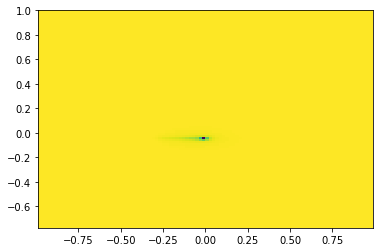

In [12]:
# try plot for Gluon
plt.hist2d(x=temp_df[temp_df['j_g']==1].j1_phirot, y=temp_df[temp_df['j_g']==1].j1_etarot,weights=temp_df[temp_df['j_g']==1].j1_ptrel,bins=100)